# Kaggle 신용카드 사기 검출

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar 31 15:04 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


## Data Preprocessing

### Unzip zip file

In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


### Read Data

In [ ]:
import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


아마도 표준화 된 데이터

In [ ]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
DF.Class.value_counts() / DF.shape[0] * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

불균형 데이터

### Time column 삭제

In [ ]:
DF.drop('Time', axis=1, inplace=True)

DF.shape

(284807, 30)

In [ ]:
X = DF.iloc[:, :-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

### Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

In [ ]:
print('학습 데이터 레이블 비율')
print(y_train.value_counts() / y_train.shape[0] * 100)
print('테스트 데이터 레이블 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이터 레이블 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


## Keras Modeling

In [ ]:
import tensorflow

tensorflow.__version__

'2.5.0'

### Model Define

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

ccfd = models.Sequential()

# Hidden Layers
ccfd.add(layers.Dense(128, activation='relu', input_shape=(29,)))
ccfd.add(layers.Dense(64, activation='relu'))
ccfd.add(layers.Dense(32, activation='relu'))

# Output Layer, 이진 분류이므로 하나의 output과 sigmoid activation funcion으로 정의
ccfd.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
ccfd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


### Model Complie

In [ ]:
ccfd.compile(loss='binary_crossentropy', # 이진 분류
             optimizer='adam',
             metrics=['Recall']) # 사기를 사기로 검출하는 재현율이 중요한 지표

### Model Fit

In [ ]:
%%time

Hist_ccfd = ccfd.fit(X_train, y_train, epochs=50,
                     batch_size=1024, validation_data=(X_test, y_test))

Epoch 1/50
195/195 [==============================] - 3s 9ms/step - loss: 0.0444 - recall: 0.3779 - val_loss: 0.0429 - val_recall: 0.4730
Epoch 2/50
195/195 [==============================] - 1s 7ms/step - loss: 0.0426 - recall: 0.6105 - val_loss: 0.0126 - val_recall: 0.7365
Epoch 3/50
195/195 [==============================] - 1s 7ms/step - loss: 0.0080 - recall: 0.7238 - val_loss: 0.0036 - val_recall: 0.8311
Epoch 4/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0049 - recall: 0.7355 - val_loss: 0.0034 - val_recall: 0.8311
Epoch 5/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0045 - recall: 0.7529 - val_loss: 0.0031 - val_recall: 0.7230
Epoch 6/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0419 - recall: 0.6599 - val_loss: 0.0567 - val_recall: 0.5405
Epoch 7/50
195/195 [==============================] - 1s 6ms/step - loss: 0.0232 - recall: 0.7384 - val_loss: 0.0040 - val_recall: 0.8311
Epoch 8/50
195/195 [==============

### 학습 결과 시각화

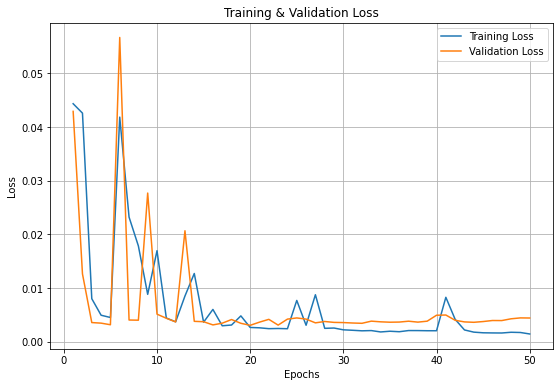

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['loss'])+1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_ccfd.history['loss'])
plt.plot(epochs, Hist_ccfd.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

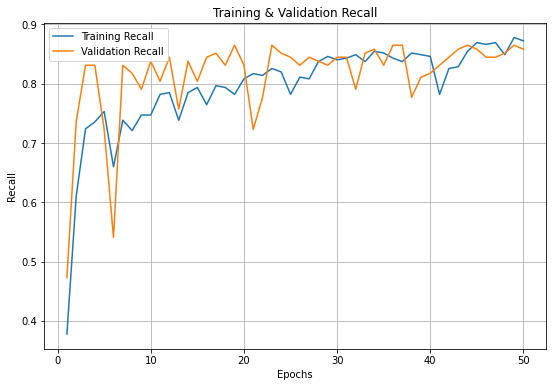

In [ ]:
epochs = range(1, len(Hist_ccfd.history['recall'])+1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_ccfd.history['recall'])
plt.plot(epochs, Hist_ccfd.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

### Model Evaluate

In [ ]:
loss, recall = ccfd.evaluate(X_test, y_test)

print(f'Loss : {loss:.5f}')
print(f'Recall : {recall:.5f}')

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0044 - recall: 0.8581
Loss : 0.00441
Recall : 0.85811


### Model Predict

In [ ]:
y_hat = ccfd.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[85281,    14],
       [   21,   127]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat))

0.9995903701883126
0.900709219858156
0.8581081081081081
